In [88]:
###### Install those packages (simply change cell type to code and run)
%pip install matplotlib numpy ipywidgets ipympl seaborn pandas

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 11.1 MB 417 kB/s            
     |████████████████████████████████| 55.7 MB 179 kB/s                    | 41.5 MB 17.2 MB/s eta 0:00:013 MB 3.4 MB/s eta 0:00:04 B/s eta 0:00:02 
     |████████████████████████████████| 503 kB 20.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [6]:
%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
def values():
    return np.linspace(0.0, 40.0, 41)**2 / 100

In [8]:
def error(values, mean=0, sigma=1.0, seed=0):
    np.random.RandomState(seed)
    values += np.random.normal(loc=mean, scale=sigma, size=values.shape)
    return values

In [45]:
def mean_filter(x, filter_len=4):
    filtered = np.zeros_like(x)
    for t in range(len(x)):
        lower_bound = max([0, t-filter_len])
        filtered[t] = np.mean(x[lower_bound:t+1])
    return filtered

In [46]:
def make_df(truth, filtered,name):
    return pd.DataFrame({'t': list(range(len(truth))), 'truth': truth, 'error': filtered-truth, 'value': filtered, 'filter': name})

frames = [make_df(values(), values(), 'perfect'),
          make_df(values(), error(values()), 'nofilter'),
          make_df(values(), mean_filter(error(values())), 'meanfilter')
]
df = pd.concat(frames, ignore_index=True)
df


t  truth     error      value      filter
0     0   0.00  0.000000   0.000000     perfect
1     1   0.01  0.000000   0.010000     perfect
2     2   0.04  0.000000   0.040000     perfect
3     3   0.09  0.000000   0.090000     perfect
4     4   0.16  0.000000   0.160000     perfect
..   ..    ...       ...        ...         ...
118  36  12.96 -1.448805  11.511195  meanfilter
119  37  13.69 -1.412889  12.277111  meanfilter
120  38  14.44 -1.669007  12.770993  meanfilter
121  39  15.21 -1.629627  13.580373  meanfilter
122  40  16.00 -1.470455  14.529545  meanfilter

[123 rows x 5 columns]

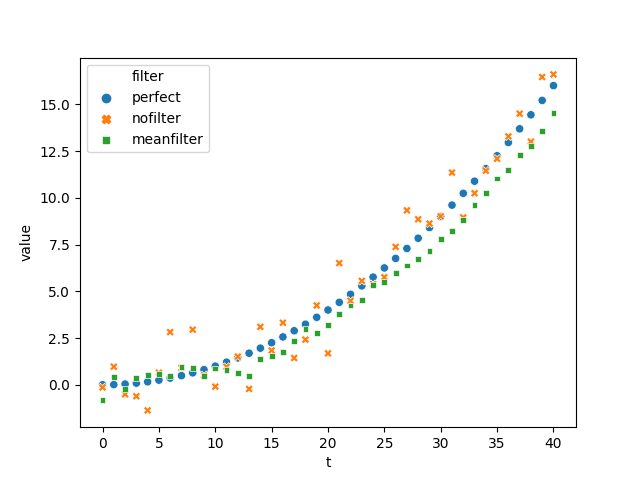

In [47]:
plt.figure()
sns.scatterplot(data=df, x='t', y='value', hue='filter', style="filter")
plt.show()